In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from IPython.display import Image
%matplotlib inline

In [3]:
def unzip_file(zip_file_path):
    try:
        with ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(os.path.join(os.getcwd(), zip_file_path.split('.')[0]))#extract to current directory
    except Exception as e:
        print(f"Error extracting {zip_file_path}: {e}")


In [6]:
cb_img = cv2.imread('checkerboard_18x18.png',0)
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

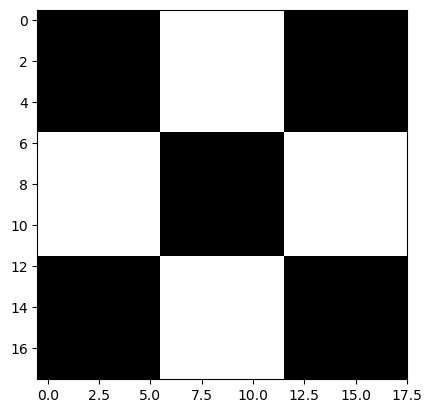

In [7]:
plt.imshow(cb_img,cmap='gray')

In [9]:
print(cb_img[0,0])
print(cb_img[0,6])

0
255


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

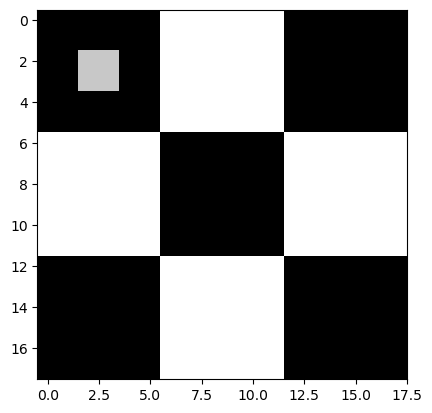

In [11]:
cb_img_copy  =  cb_img.copy () 
cb_img_copy [ 2 , 2 ] = 200 
cb_img_copy [ 2 , 3 ] = 200 
cb_img_copy [ 3 , 2 ] = 200 
cb_img_copy [ 3 , 3 ] = 200 
# 同上# cb_img_copy [ 2:3,2:3] = 200 
plt.imshow(cb_img_copy , cmap = "gray" ) 
print ( cb_img_copy )
   

Cropping Images

    Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

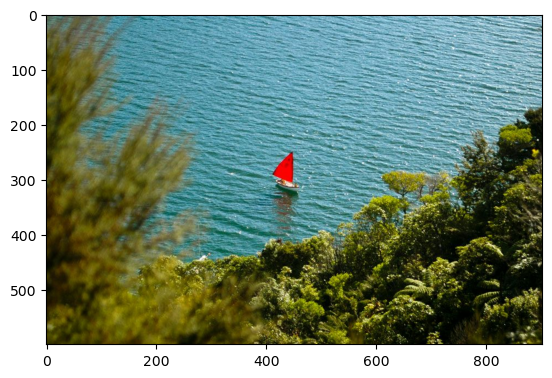

In [14]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpeg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

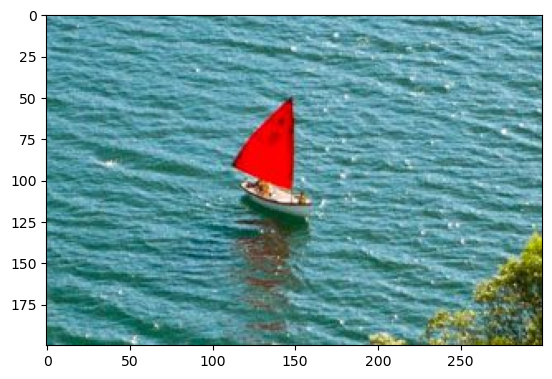

In [15]:
img_NZ_boat_cropped = img_NZ_rgb[200:400, 300:600]
plt.imshow(img_NZ_boat_cropped)

Resizing Images

    cv2.resize():resizes the image src down to or up to the specified size.

    src:mandatory, input image

     dsize:mandatory, output image size

     fx:optional, scale factor along the horizontal axis;when it is 0, it is calculated as (new_width / src_width)

     fy:optional, scale factor along the vertical axis;when it is 0, it is calculated as (new_height / src_height)

        The output image has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.


In [25]:
resized_copped_img = cv2.resize(img_NZ_boat_cropped, None, fx=0.5, fy=0.5)
print(resized_copped_img.shape)

resized_copped_img = cv2.resize(img_NZ_boat_cropped, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
print(resized_copped_img.shape)


(100, 150, 3)
(400, 600, 3)


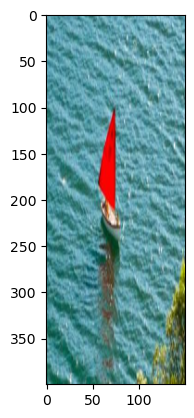

In [32]:
expected_width = int(img_NZ_boat_cropped.shape[1]*0.5)
expected_height = int(img_NZ_boat_cropped.shape[0] * 2)
dim = (expected_width, expected_height)

resized_copped_img = cv2.resize(img_NZ_boat_cropped, dim, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_copped_img)
plt.show()


方法二、

    Resize while maintaining aspect ratio
    调整大小并保持横纵比

0.6666666666666666


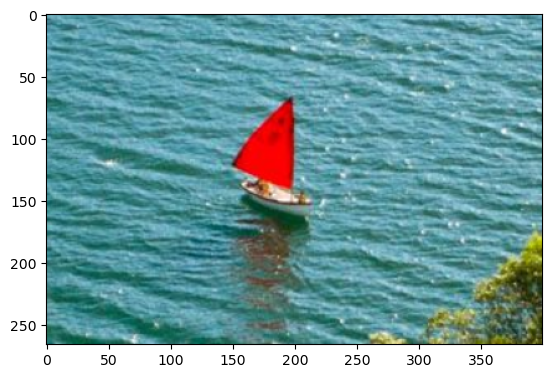

In [36]:
#固定纵横比
aspect_ratio = img_NZ_boat_cropped.shape[0] / img_NZ_boat_cropped.shape[1]
print(aspect_ratio)

#指定width
new_width = 400
new_height = int(new_width * aspect_ratio)
dim = (new_width, new_height)

resized_copped_img = cv2.resize(img_NZ_boat_cropped, dim, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_copped_img)
plt.show()

翻转图像
links：https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

        # 水平翻转
        cv2.flip(img, 1, img)

        # 垂直翻转
        cv2.flip(img, 0, img)
        
        # 水平垂直翻转
        cv2.flip(img, -1, img)

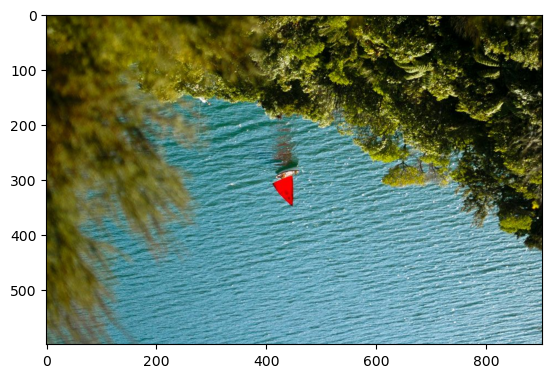

In [39]:
NZ_bota_rgb = cv2.imread('New_Zealand_Boat.jpeg')[:, :, ::-1]
flip_NZ_x = cv2.flip(NZ_bota_rgb, 0)
plt.imshow(flip_NZ_x)
plt.show()